## 1. Import libraries

In [62]:
import numpy as np
import pandas as pd

# machine learning library
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import log_loss

#import XGBOOST Libraries
import xgboost as xgb
from sklearn.grid_search import GridSearchCV

#Configure Panda
pd.options.display.width = 200

## 2. Loading and pre-processing data
!!! ATTENTION: In order to load the following files you first need to completely run the latest versions of Feature_Engineering_Members.ipynb and Feature_Engineering_Transactions.ipynb. !!!
### 2.1 Load the files

In [63]:
#Load data in
# From train.csv, we will extract the is_churn and use it as the y-label for training. 
train = pd.read_csv('data/train.csv')

# From sample_submission_v2.csv, we will extract the msno's 
test = pd.read_csv('data/sample_submission_v2.csv')

# This is the input for our model
transactions = pd.read_csv('data/final_transactions.csv')
final_members=pd.read_csv('data/final_members.csv')

#user_logs = pd.read_csv('data/final_user_logs.csv')

### 2.2 Merge the different files

In [64]:
# Creating datasets witgh input&outputs
train_data = pd.merge(train,final_members,on='msno',how='left')
train_data = pd.merge(train_data,transactions,how='left',on='msno',left_index=True, right_index=True)

#train_data_u_logs = pd.merge(train_data, user_logs, on='msno',left_index=True, right_index=True)

# Creating datasets with only inputs
# Note that the submission_v2.csv file does NOT contain ouputs (they are all 0)
test_data = pd.merge(test,final_members,on='msno',how='left')
test_data = pd.merge(test_data,transactions,how='left',on='msno',left_index=True, right_index=True)

#test_data_u_logs = pd.merge(test_data, user_logs ,how='left',on='msno',left_index=True, right_index=True)

#print(data.shape)

### 2.4 Data cleaning

In [65]:
#check for null values
print(train_data.isnull().sum())
#print(train_data_u_logs.isnull().sum())

msno                                 0
is_churn                             0
bd                              115770
city_1                          115770
city_3                          115770
city_4                          115770
city_5                          115770
city_6                          115770
city_7                          115770
city_8                          115770
city_9                          115770
city_10                         115770
city_11                         115770
city_12                         115770
city_13                         115770
city_14                         115770
city_15                         115770
city_16                         115770
city_17                         115770
city_18                         115770
city_19                         115770
city_20                         115770
city_21                         115770
city_22                         115770
reg_year_2012                   115770
reg_year_2013            

In [66]:
#Get rid of null-values

#For train data
#Set city null values to o in train data
cities = ['city_1','city_3','city_4','city_5','city_6','city_7','city_8','city_9','city_10','city_11','city_12','city_13','city_14','city_15','city_16','city_17','city_18','city_19','city_20','city_21','city_22']
for i in range(0,len(cities)):
        inpt = cities[i]
        train_data[inpt]=train_data[inpt].fillna(value=0)
        test_data[inpt]=test_data[inpt].fillna(value=0)
        
reg_dates=['reg_year_2012','reg_year_2013','reg_year_2014','reg_year_2015','reg_year_2016','reg_year_2017']        
for i in range(0,len(reg_dates)):
        inpt = reg_dates[i]
        train_data[inpt]=train_data[inpt].fillna(value=0)
        test_data[inpt]=test_data[inpt].fillna(value=0)

reg_meth=['reg_3','reg_4','reg_7','reg_9','reg_11']
for i in range(0,len(reg_meth)):
        inpt = reg_meth[i]
        train_data[inpt]=train_data[inpt].fillna(value=0)
        test_data[inpt]=test_data[inpt].fillna(value=0)     
        
train_data['bd_norm']=train_data['bd_norm'].fillna(value=0)
test_data['bd_norm']=test_data['bd_norm'].fillna(value=0)     

train_data['bd']=train_data['bd'].fillna(value=0)
test_data['bd']=test_data['bd'].fillna(value=0)

#check for null values
print(train_data.isnull().sum())
print(test_data.isnull().sum())

msno                            0
is_churn                        0
bd                              0
city_1                          0
city_3                          0
city_4                          0
city_5                          0
city_6                          0
city_7                          0
city_8                          0
city_9                          0
city_10                         0
city_11                         0
city_12                         0
city_13                         0
city_14                         0
city_15                         0
city_16                         0
city_17                         0
city_18                         0
city_19                         0
city_20                         0
city_21                         0
city_22                         0
reg_year_2012                   0
reg_year_2013                   0
reg_year_2014                   0
reg_year_2015                   0
reg_year_2016                   0
reg_year_2017 

In [ ]:
# Data cleaning with user_logs added
user_logs_array = ['num_100', 'entries', 'num25_ratio', 'num50_ratio', 'num75_ratio', 'num985_ratio']
#for i in range(0,len(user_logs_array)):
 #       inpt = user_logs_array[i]
  #      train_data[inpt]=train_data[inpt].fillna(value=0)
   #     test_data[inpt]=test_data[inpt].fillna(value=0)

In [67]:
#Drop unwanted columns (this may change with new insights or new code!)
unwanted = ['msno','transaction_date_dtype','membership_expire_date_dtype']

#Before dropping the msno of test, we need to save it for the sumission
msno=test_data.msno

data_input = train_data.drop(unwanted, axis=1)
data_input = data_input.drop('is_churn',axis=1)

data_output = train_data['is_churn']

prediction_input = test_data.drop(unwanted, axis=1)
prediction_input = prediction_input.drop(['is_churn'], axis=1)

print(data_input.shape)
print(data_output.shape)
print(prediction_input.shape)

(992931, 68)
(992931,)
(907471, 68)


### user_logs
train_data_u_logs = train_data_logs.dropna()
train_data_reduced = train_data_u_logs.drop(columns=['num_100', 'entries', 'num25_ratio', 'num50_ratio', 'num75_ratio', 'num985_ratio'],axis=1)
print(train_data_logs.shape)
print(train_data_reduced.shape)

train_data_u_logs = train_data_u_logs.drop(unwanted, axis=1)
train_data_reduced = train_data_reduced.drop(unwanted, axis=1)

In [68]:
# Splitting input/output data into train and test sets in order to check efficiency of our models

x_train, x_test, y_train, y_test = train_test_split(data_input, data_output, test_size=0.2, random_state=42)



In [ ]:
# for user_logs data
#data_input_ul = train_data_logs.drop('is_churn',axis=1)
#data_output_ul = train_data_logs['is_churn']
#print(data_input_ul.shape)
#print(data_output_ul.shape)
#x_train_ul, x_test_ul, y_train_ul, y_test_ul = train_test_split(data_input_ul, data_output_ul, test_size=0.2, random_state=42)

# for user_logs data
#data_input_r = train_data_reduced.drop('is_churn',axis=1)
#data_output_r = train_data_reduced['is_churn']
#print(data_input_r.shape)
#print(data_output_r.shape)
#x_train_r, x_test_r, y_train_r, y_test_r = train_test_split(data_input_r, data_output_r, test_size=0.2, random_state=42)

## 3. Algorithms

### 3.1 Random Forest

In [79]:
# Random Forrest: fitting and testing the model
model = RandomForestRegressor()
model_rfr = model.fit(x_train, y_train)
print('Model fitted!')
y_pred_f = model.predict(x_test)
print('Prediction done!')
print("Logloss for Random Forrest is: %.5f"%log_loss(y_test,y_pred_f))

Model fitted!
Prediction done!
Logloss for Random Forrest is: 0.86914


### user_logs included
model = RandomForestRegressor()
model.fit(x_train_ul, y_train_ul)
print('Model fitted!')
y_pred_f = model.predict(x_test_ul)
print('Prediction done!')
print("Logloss for Random Forrest, incl. user_logs, is: %.2f"%log_loss(y_test_ul,y_pred_f))

In [ ]:
# Creating a prediction for april with the prediction model:

#y_pred_f_s = model.predict(prediction_input)

### 3. Linear Regression

In [80]:
# Linear Regression
model = LinearRegression()
model_lr = model.fit(x_train, y_train)
print('Model fitted!')
# Make predicitons for test data
y_pred_l = model.predict(x_test)
y_pred_l = np.absolute(y_pred_l)
print('Prediction done!')
print("Logloss for Linear Regression is: %.5f"%log_loss(y_test,y_pred_l))

Model fitted!
Prediction done!
Logloss for Linear Regression is: 0.22353


### user_logs included
model = LinearRegression()
model.fit(x_train_ul, y_train_ul)
print('Model fitted!')
y_pred_f = model.predict(x_test_ul)
print('Prediction done!')
print("Logloss for Random Forrest, incl. user_logs, is: %.2f"%log_loss(y_test_ul,y_pred_f))

In [ ]:
# Creating a prediction for april with the prediction model:

#y_pred_l_s = model.predict(prediction_input)

### AdaBoost()

In [81]:
# Run AdaBoost
model_abr = AdaBoostRegressor()
model_ada = model_abr.fit(x_train, y_train)
y_pred_abr = model_abr.predict(x_test)
print("Logloss for AdaBoost is: %.5f"%log_loss(y_test,y_pred_abr))

Logloss for AdaBoost is: 0.22078


### user_logs included
model_abr = AdaBoostRegressor()
model_ada_ul = model_abr.fit(x_train_ul, y_train_ul)
y_pred_abr = model_abr.predict(x_test_ul)
print("Logloss for AdaBoost is: %.5f"%log_loss(y_test_ul,y_pred_abr))

In [ ]:
# Creating a prediction for april with the prediction model:

#y_pred_abr_s = model.predict(prediction_input)

### 3 XGBoost

In [69]:
# Splitting training data into test and train 
x_train, x_test, y_train, y_test = train_test_split(data_input, data_output, test_size=0.20, random_state=42)

# Creating DMatrix for xgboost
dtrain = xgb.DMatrix(x_train, label = y_train)
dtest = xgb.DMatrix(x_test, label = y_test)
print('Done.')

Done.


In [70]:
#XG Boost
# Prepare parameters for xgboost

def run_xgb():
    param = {
        'max_depth': 4,  # the maximum depth of each tree. Try with max_depth: 2 to 10.
        'eta': 0.3,  # the training step for each iteration. Try with ETA: 0.1, 0.2, 0.3...
        'silent': 1,  # logging mode - quiet
        'objective': 'multi:softprob',  # error evaluation for multiclass training
        'num_class': 3}  # the number of classes that exist in this datset
    num_round = 20  # the number of training iterations. Try with num_round around few hundred!
    #----------------
    bst = xgb.train(param, dtrain, num_round)
    print('Modeling done!')

    y_pred_xgb = bst.predict(dtest)
    print('Prediction done!')

    best_preds = np.asarray([np.argmax(line) for line in y_pred_xgb])

    y_pred_xgb = y_pred_xgb[:,1] #Column 2 out of 3

    print("Logloss for XGBoost is: %.5f"%log_loss(y_test,y_pred_xgb))
    
    #Return the booster object to use it later
    return bst
    
bst = run_xgb()

Modeling done!
Prediction done!
Logloss for XGBoost is: 0.21801


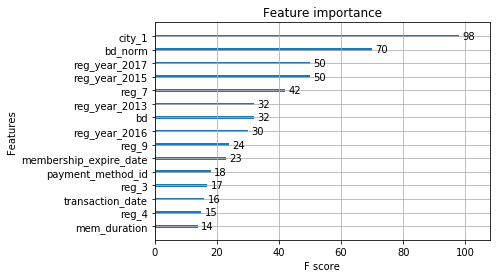

In [71]:
xgb.plot_importance(bst, max_num_features = 15)

In [72]:
#Get the weights of the different features used to predict the model.
scores_w = bst.get_score(fmap='', importance_type='weight')

print(scores_w)

{'reg_7': 42, 'bd_norm': 70, 'reg_year_2016': 30, 'reg_year_2015': 50, 'city_1': 98, 'bd': 32, 'reg_year_2017': 50, 'reg_year_2013': 32, 'actual_amount_paid': 9, 'payment_method_id': 18, 'reg_3': 17, 'is_auto_renew': 3, 'reg_4': 15, 'city_19': 1, 'membership_expire_date': 23, 'city_11': 4, 'reg_9': 24, 'city_6': 1, 'city_8': 3, 'reg_year_2014': 11, 'transaction_date': 16, 'city_13': 7, 'payment_method_id_38': 6, 'city_5': 6, 'payment_method_id_40': 4, 'mem_duration': 14, 'city_3': 1, 'city_12': 8, 'plan_list_price_129': 2, 'city_4': 4, 'payment_method_id_31': 2, 'reg_year_2012': 1}


In [73]:
# Checking which features xgboost does not use, drop them from the training-set and run the algorithm again. 
unwanted_2 = []
for f in dtrain.feature_names:
    if f not in scores_w:
        unwanted_2.append(f)
print(unwanted_2)

['city_7', 'city_9', 'city_10', 'city_14', 'city_15', 'city_16', 'city_17', 'city_18', 'city_20', 'city_21', 'city_22', 'reg_11', 'is_cancel', 'payment_method_id_30', 'payment_method_id_32', 'payment_method_id_33', 'payment_method_id_34', 'payment_method_id_35', 'payment_method_id_36', 'payment_method_id_37', 'payment_method_id_39', 'payment_method_id_41', 'pay_method_churn', 'payment_plan_days_7', 'payment_plan_days_30', 'payment_plan_days_90', 'payment_plan_days_180', 'payment_plan_days_195', 'payment_plan_days_410', 'plan_list_price_99', 'plan_list_price_149', 'plan_list_price_180', 'plan_list_price_1260', 'plan_list_price_1299', 'plan_list_price_1300', 'plan_list_price_1399']


In [74]:
# Removing features note used in xgboost and rerun model
data_input.drop(unwanted_2, axis=1)

# Splitting training data into test and train 
x_train, x_test, y_train, y_test = train_test_split(data_input, data_output, test_size=0.20, random_state=42)

# Creating DMatrix for xgboost
dtrain = xgb.DMatrix(x_train, label = y_train)
dtest = xgb.DMatrix(x_test, label = y_test)
print('Done.')

run_xgb()

Done.
Modeling done!
Prediction done!
Logloss for XGBoost is: 0.21801


In [87]:
#After model is built, we make prediction for churning in april, using msno from sample_submission_v2
s_test = xgb.DMatrix(prediction_input)
s_predict = bst.predict(s_test)
best_preds = np.asarray([np.argmax(line) for line in s_predict])

s_predict = s_predict[:,1] #Column 2 out of 3
print(s_predict)

[0.01570694 0.05391357 0.04113148 ... 0.02670189 0.0263796  0.04038385]


###4. Creating submission file

In [88]:
#Prepare submission file
my_submission = pd.DataFrame({'msno': msno, 'is_churn': s_predict})
#think about changing y_pred_1 if you want to use a diffrenet algorithm
#y_pred_1 was one of the reasons for the previous bug
print(my_submission.head())
cols = my_submission.columns.tolist()
cols = cols[-1:] + cols[:-1]
my_submission = my_submission[cols]
print(my_submission.head())
print(my_submission.count())

my_submission.to_csv('submission.csv', index=False)
print('Done! :-)')

   is_churn                                          msno
0  0.015707  4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=
1  0.053914  aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=
2  0.041131  rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=
3  0.049197  WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=
4  0.155078  aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=
                                           msno  is_churn
0  4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=  0.015707
1  aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=  0.053914
2  rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=  0.041131
3  WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=  0.049197
4  aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=  0.155078
msno        907471
is_churn    907471
dtype: int64
Done! :-)


### 4. Cross validation

In [78]:
#Impoirt libraries for cross validation
import xgboost as xgb

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score

In [ ]:
###Cross Validation RandomForestRegressor

In [89]:
#Create the pipeline
my_pipeline = make_pipeline(Imputer(), model_rfr)
print('Pipeline created.')
#Get cross validation scores
scores = cross_val_score(my_pipeline, data_input, data_output, scoring='neg_mean_absolute_error', cv=5)
print(scores)

#Single measure of model quality
print('Mean Absolute Error %5f' %(-1 * scores.mean()))

Pipeline created.
[-0.31961307 -0.07932942 -0.07982218 -0.07896123 -0.07959146]
Mean Absolute Error 0.127463


In [ ]:
###Cross validation LinearRegression

In [90]:
#Create the pipeline
my_pipeline = make_pipeline(Imputer(), model_lr)

#Get cross validation scores
scores = cross_val_score(my_pipeline, data_input, data_output, scoring='neg_mean_absolute_error', cv=5)
print(scores)

#Single measure of model quality
print('Mean Absolute Error %5f' %(-1 * scores.mean()))

[-0.31961307 -0.07731301 -0.07744156 -0.07714977 -0.07727828]
Mean Absolute Error 0.125759


In [ ]:
###Cross Validation AdaBoost

In [91]:
#Create the pipeline
my_pipeline = make_pipeline(Imputer(), model_ada)

#Get cross validation scores
scores = cross_val_score(my_pipeline, data_input, data_output, scoring='neg_mean_absolute_error', cv=5)
print(scores)

#Single measure of model quality
print('Mean Absolute Error %5f' %(-1 * scores.mean()))

[-0.31961307 -0.07612732 -0.07607118 -0.07570381 -0.07635066]
Mean Absolute Error 0.124773


### Cross Validation with XGBoost (really slow, 30 - 45 minutes)

In [ ]:

#Create the pipeline
my_pipeline = make_pipeline(Imputer(), xgb.XGBClassifier())
print('Pipeline created.')
#Get cross validation scores
scores = cross_val_score(my_pipeline, data_input, data_output, scoring='neg_log_loss', cv=3)
print(scores)

#Single measure of model quality
print('Log Loss %5f' %(-1 * scores.mean()))
